In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, KFold
import random

from sklearn import metrics
from collections import Counter
import argparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
data = pd.read_csv("../CSC_Dapp_classification/dapps_with_features_v4.csv")

In [3]:
categories = data.category

In [4]:
SEED = 42

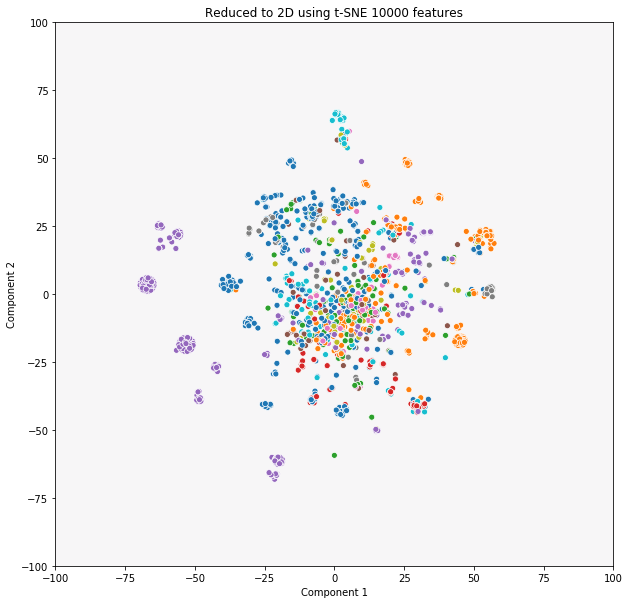

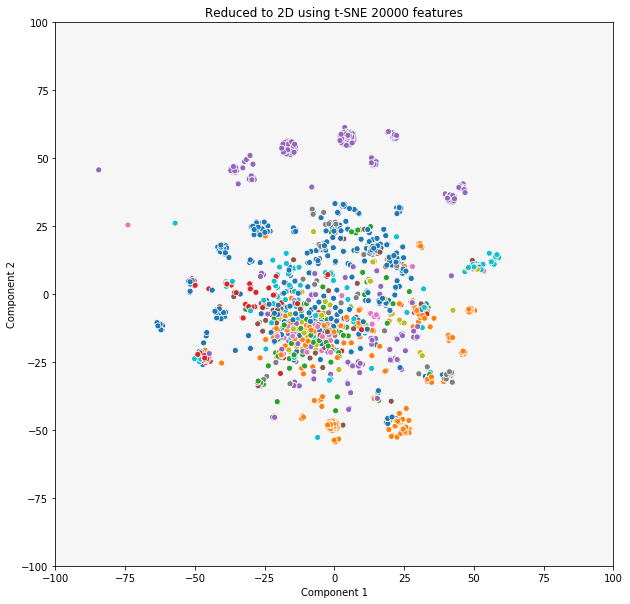

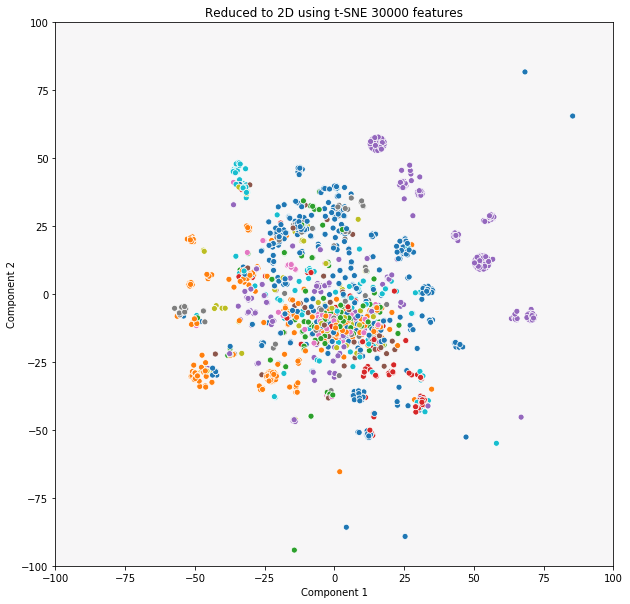

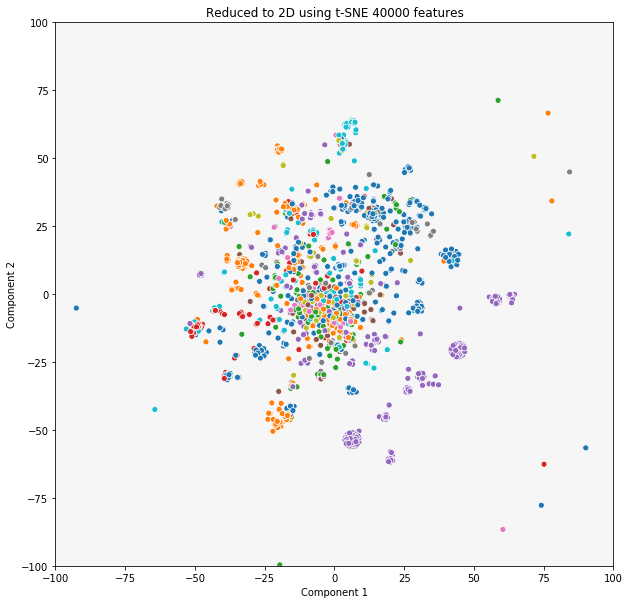

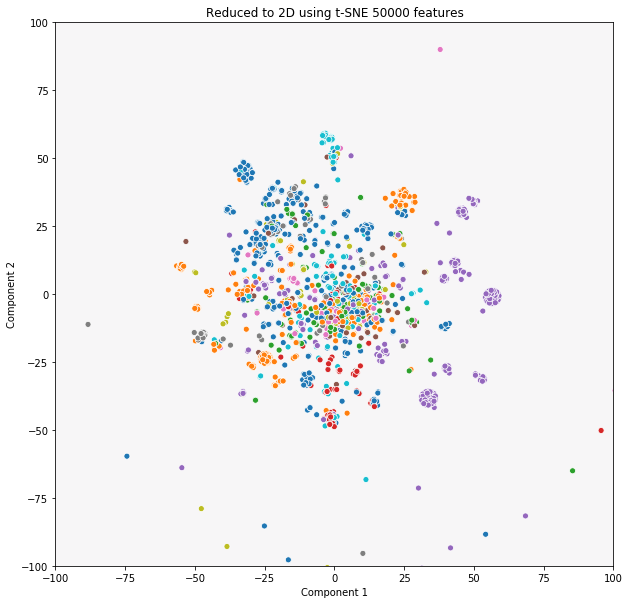

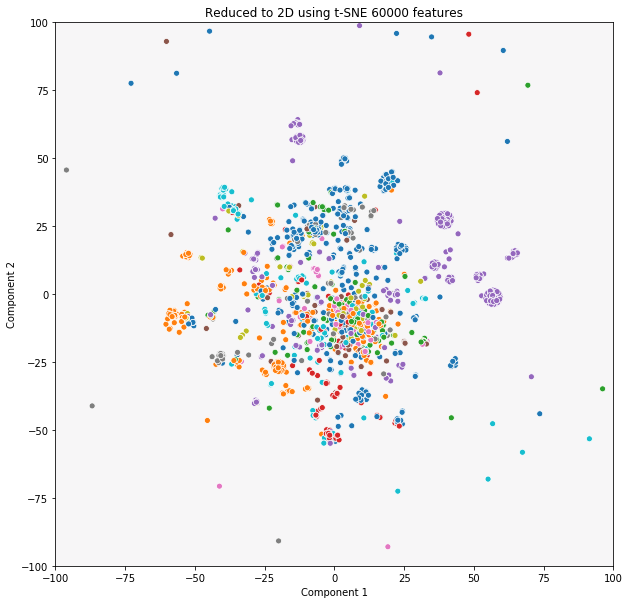

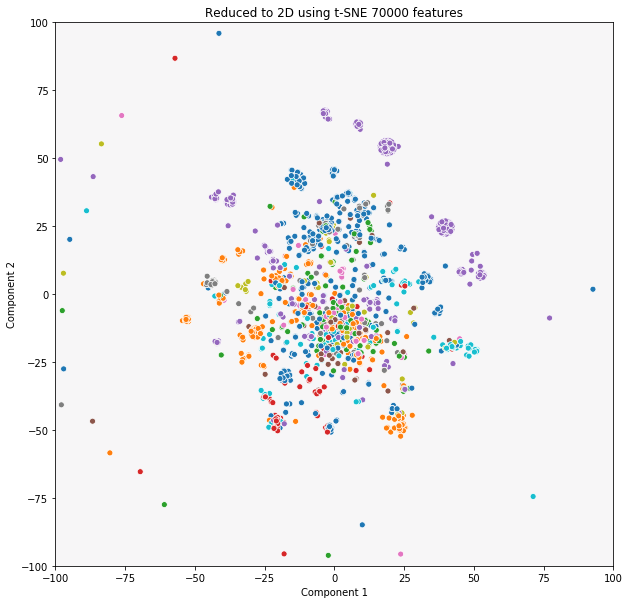

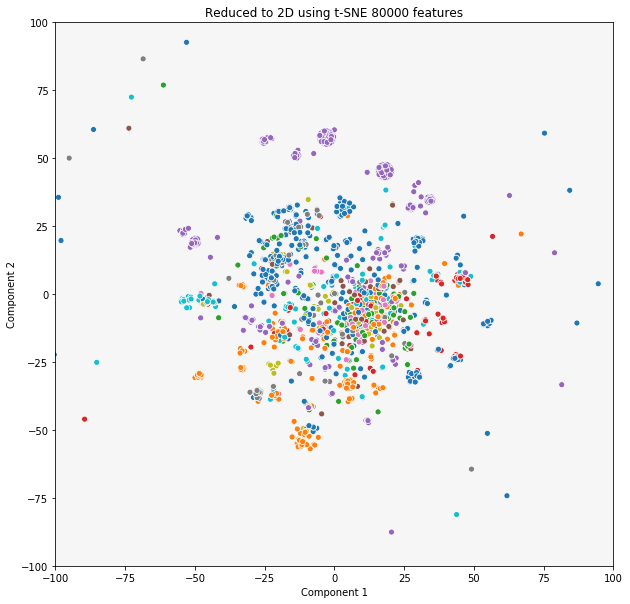

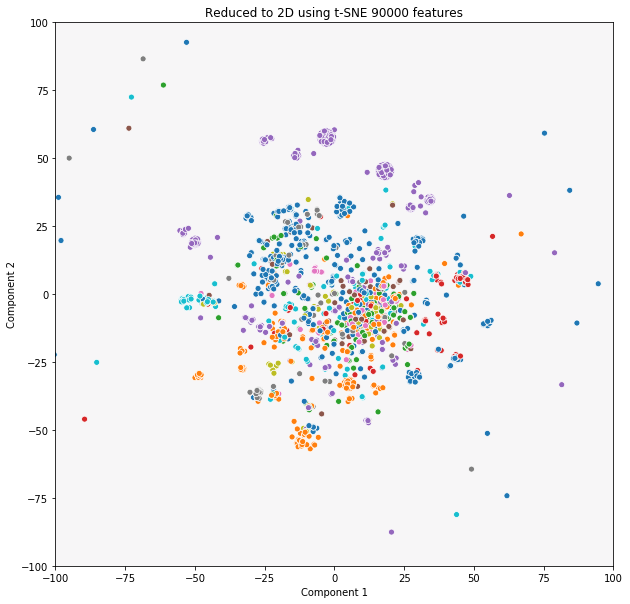

In [5]:
for i, f in enumerate(range(10000, 100000, 10000)):
    word_vectorizer   = TfidfVectorizer(
    sublinear_tf  = True,
    strip_accents = 'unicode',
    analyzer      = 'word',
    token_pattern = r'\w{1,}',
    #stop_words    = 'english',
    ngram_range   = (1, 1),
    max_features  = f) # max 144018
    
    word_vectorizer.fit(data.SC_full)
    word_features = word_vectorizer.transform(data.SC_full)
    X = word_features
    
    # t-SNE on 2-dimensions
    tsne = TSNE(n_components=2, random_state=SEED)
    tsne.fit(X)
    tsne_X = tsne.fit_transform(X)

    # Plot data with dimensionality reduction PCA
    fig = plt.figure(figsize=(10, 10))
    ax = sns.scatterplot(x=tsne_X[:,0], y=tsne_X[:,1], hue=categories)
    ax.get_legend().remove()
    ax.set_facecolor(('#F7F6F7'))
    plt.xlim((-100, 100))
    plt.ylim((-100, 100))
    #plt.scatter(tsne_X[:,0], tsne_X[:,0], c=y_color, marker='o')

    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Reduced to 2D using t-SNE {f} features')

    plt.savefig(f'./img_fc/tsne_reduce_{i}.png', facecolor='#F7F6F7')